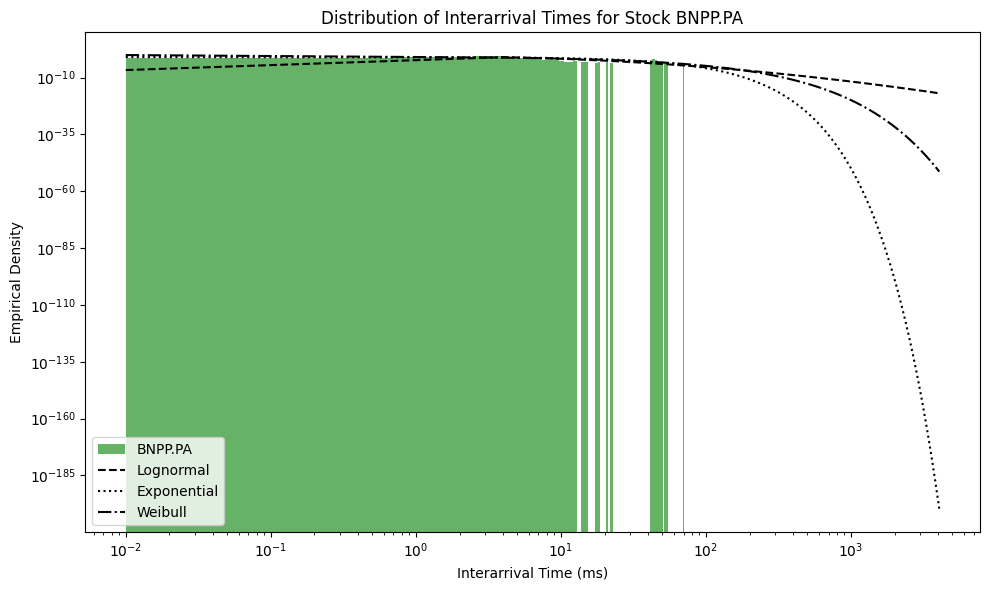

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, expon, weibull_min


def calculate_interarrival_times(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # 提取时间列并转换为毫秒时间戳
    # df["Time"] = pd.to_datetime(df["Time"], format="%H%M%S")
    # df["TimeInMilliseconds"] = (
    #     df["Time"].dt.hour * 3600000
    #     + df["Time"].dt.minute * 60000
    #     + df["Time"].dt.second * 1000
    # )

    # 计算相邻数据的时间差（毫秒）
    df["InterarrivalTime"] = df["Time"].diff()
    df = df.dropna(subset=["InterarrivalTime"])  # 删除第一行的NaN值
    df["InterarrivalTime"] = df["InterarrivalTime"] / 1000 # 转换为秒
    # 删除负值
    positive =  df["InterarrivalTime"] > 0
    df = df[positive]
    too_large = df["InterarrivalTime"] < 2*3600
    df = df[too_large]
    return df["InterarrivalTime"]


def plot_interarrival_time_distribution(interarrival_times, scale="linear", bins=5000):
    # 设置图形
    plt.figure(figsize=(10, 6))

    # 绘制经验密度
    plt.hist(
        interarrival_times,
        bins=bins,
        density=True,
        alpha=0.6,
        color="g",
        label="BNPP.PA",
    )

    # 拟合并绘制理论分布
    params_lognormal = lognorm.fit(interarrival_times, floc=0)
    params_expon = expon.fit(interarrival_times, floc=0)
    params_weibull = weibull_min.fit(interarrival_times, floc=0)

    x = np.linspace(min(interarrival_times), max(interarrival_times), 1000)

    # 绘制Lognormal分布
    plt.plot(x, lognorm.pdf(x, *params_lognormal), "k--", label="Lognormal")
    # 绘制Exponential分布
    plt.plot(x, expon.pdf(x, *params_expon), "k:", label="Exponential")
    # 绘制Weibull分布
    plt.plot(x, weibull_min.pdf(x, *params_weibull), "k-.", label="Weibull")

    # 设置坐标轴的尺度
    if scale == "log":
        plt.xscale("log")
        plt.yscale("log")
    elif scale == "linear":
        plt.xscale("linear")
        plt.yscale("linear")
    elif scale == "exp":
        plt.xscale("symlog")  # 对于指数增长使用对数对称尺度

    # 设置标签和标题
    plt.xlabel("Interarrival Time (ms)")
    plt.ylabel("Empirical Density")
    plt.title("Distribution of Interarrival Times for Stock BNPP.PA")
    plt.legend(loc="best")

    # 显示图像
    plt.tight_layout()
    plt.show()


# 示例使用：
file_path = "data/ochl/tick/000001.SZ1-Tick-20130104-L1.CSV"  # 替换为你的文件路径
interarrival_times = calculate_interarrival_times(file_path)
plot_interarrival_time_distribution(interarrival_times, scale="log")